<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [6]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [7]:
# Answer: 979 rows, 6, columns
movies.shape


(979, 6)

#### Check the data type of each column.

In [8]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [9]:
# Answer:
movies.loc[:,'duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [10]:
# Answer:
movies.sort_values('duration').head(1)
movies.sort_values('duration').tail(1)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

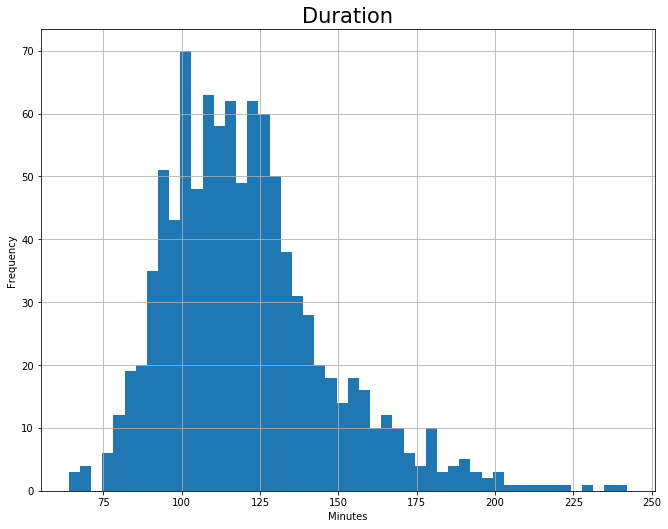

In [11]:
# Answer:
ax = movies.loc[:,'duration'].hist(bins=50, figsize=(11,8.5));
ax.set_title('Duration', fontsize=21);
ax.set_ylabel('Frequency');
ax.set_xlabel('Minutes');

# movies.loc[:,'duration'].plot(kind='hist');

#### Use a box plot to display that same data.

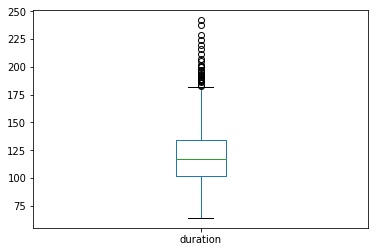

In [12]:
# Answer:
movies.loc[:,'duration'].plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [13]:
# Answer:
movies.loc[:,'content_rating'].value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

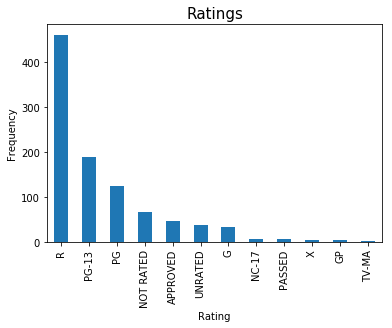

In [14]:
# Answer:
axx = movies.loc[:,'content_rating'].value_counts().plot(kind='bar');

axx.set_title('Ratings', fontsize=15);
axx.set_ylabel('Frequency');
axx.set_xlabel('Rating');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [15]:
# Answer:

movies.loc[movies.content_rating.isin(['NOT RATED','APPROVED','PASSED','GP']),'content_rating']='UNRATED'
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [16]:
# Answer:
movies.loc[movies.content_rating.isin(['X','TV-MA']),'content_rating']='NC-17'
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [17]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [18]:
movies.loc[movies.content_rating.isnull()]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [178]:
# Answer:
movies.loc[:,'content_rating'].fillna(value='Unrated', inplace=True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [19]:
# Answer:
two_plus_hrs = movies.loc[:,'duration'] >= 120

movies.loc[:,'two_plus_hrs'] = (
    movies.apply(lambda row: row['duration'] >=120, axis = 1)
)

movies.groupby('two_plus_hrs')['star_rating'].mean()

two_plus_hrs
False    7.838667
True     7.948899
Name: star_rating, dtype: float64

#### Use a visualization to detect whether there is a relationship between duration and star rating.

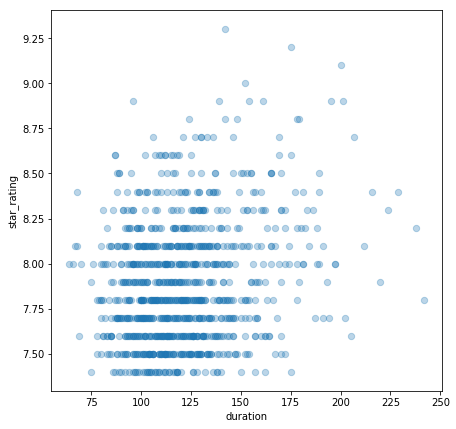

In [20]:
# Answer:
movies.plot(kind='scatter', x='duration', y='star_rating',s=40, alpha=0.3, figsize=(7,7));

#### Calculate the average duration for each genre.

In [21]:
# Answer:
movies.groupby('genre')['duration'].mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

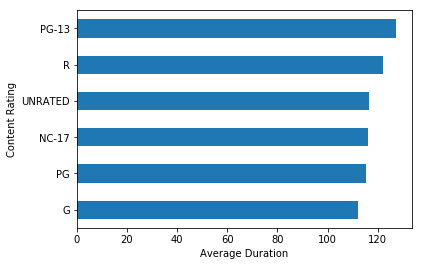

In [22]:
# Answer:
ax = movies.groupby('content_rating')['duration'].mean().sort_values().plot(kind='barh');

ax.set_xlabel('Average Duration');
ax.set_ylabel('Content Rating');

#### Determine the top rated movie (by star rating) for each genre.

In [23]:
# Answer:
# this doesn't actually do it. It shows the max star rating by genre but not the movie
movies.groupby('genre')['star_rating'].max()

genre
Action       9.0
Adventure    8.9
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.3
Drama        8.9
Family       7.9
Fantasy      7.7
Film-Noir    8.3
History      8.0
Horror       8.6
Mystery      8.6
Sci-Fi       8.2
Thriller     8.0
Western      8.9
Name: star_rating, dtype: float64

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [40]:
movies.loc[:,"title"].describe(include=['object'])

count           979
unique          975
top       True Grit
freq              2
Name: title, dtype: object

In [41]:
movies.loc[:,'title'].value_counts()

True Grit                                    2
Dracula                                      2
Les Miserables                               2
The Girl with the Dragon Tattoo              2
The Bride of Frankenstein                    1
Sunset Blvd.                                 1
A Simple Plan                                1
The Kid                                      1
Where Eagles Dare                            1
The Departed                                 1
The Man from Nowhere                         1
Inside Man                                   1
Strangers on a Train                         1
The Bridge on the River Kwai                 1
La Vie en Rose                               1
The Sea Inside                               1
Trading Places                               1
Shadow of a Doubt                            1
A Prophet                                    1
Metropolis                                   1
Delicatessen                                 1
Kelly's Heroe

In [139]:
movies.loc[:,'has_dupe'] = (
    movies.loc[:,'title'].duplicated(keep=False)   
)

dupes = movies.loc[:,'has_dupe'] == True
movies.loc[dupes,:]

# Answer: 
# comparing star_rating, content_rating, actors_list, and duration, these are not duplicates but remakes

,star_rating,title,content_rating,genre,duration,actors_list,two_plus_hrs,has_dupe
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe...",True,True
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",True,True
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei...",False,True
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat...",True,True
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma...",False,True
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",True,True
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",True,True
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",True,True


# Calculate the average star rating for each genre, but only include genres with at least 10 movies

#### Option 1: manually create a list of relevant genres, then filter using that list

In [180]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [174]:
# Answer:

genre_count = movies.loc[:,'genre'].value_counts()

genre_ten_plus = dict(genre_count[genre_count > 9])

genre_ten_plus = list(genre_ten_plus.keys())

movies.loc[:,'ten_plus'] = movies.loc[:,'genre'].isin(genre_ten_plus)

most_genres = movies.loc[:,'ten_plus'] == True

movies.loc[most_genres,:].groupby('genre')['star_rating'].mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [177]:
# Answer:
movies.groupby('genre')['star_rating'].mean() 

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Family       7.850000
Fantasy      7.700000
Film-Noir    8.033333
History      8.000000
Horror       7.806897
Mystery      7.975000
Sci-Fi       7.920000
Thriller     7.680000
Western      8.255556
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [28]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!